
TP2 - CLASE 3

Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.


Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

Usando el método descripto en el paper "Image Sharpness Measure for Blurred Images in Frequency Domain" comparar el resultado de un filtrado por convolución con el filtrado espectral.

Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper "Analysis of focus measure operators in shape-from-focus"

In [142]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [178]:
def create_gauss_filter(h, w, k_size, sigma):
    """
    Crea un filtro gaussiano en el dominio espacial y su transformada de Fourier.
    
    Args:
        h (int): Altura de la imagen.
        w (int): Ancho de la imagen.
        k_size (int): Tamaño del kernel.
        sigma (float): Desviación estándar de la gaussiana.
        
    Returns:
        tuple: (filtro_gaussiano, filtro_gaussiano_fourier)
    """
    
def create_gauss_filter(h, w, k_size, sigma):
    # Crear el kernel gaussiano en el dominio espacial
    x = np.linspace(-k_size // 2, k_size // 2, k_size)
    y = np.linspace(-k_size // 2, k_size // 2, k_size)
    x, y = np.meshgrid(x, y)
    gauss_kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
    gauss_kernel = gauss_kernel / np.sum(gauss_kernel)
    
    # Pad kernel to the size of the image
    padded_gauss_kernel = np.zeros((h, w))
    pad_x = (h - k_size) // 2
    pad_y = (w - k_size) // 2
    padded_gauss_kernel[pad_x:pad_x+k_size, pad_y:pad_y+k_size] = gauss_kernel
    
    # Calcular la transformada de Fourier del kernel gaussiano
    gauss_kernel_fourier = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(padded_gauss_kernel)))
    
    return padded_gauss_kernel, gauss_kernel_fourier


In [179]:
#funciones auxiliares

def apply_filter(image, gauss_kernel, gauss_kernel_fourier):
    # Aplicar el filtro gaussiano en el dominio espacial
    filtered_image_spatial = cv2.filter2D(image, -1, gauss_kernel)
    
    # Aplicar el filtro gaussiano en el dominio espectral
    image_fft = np.fft.fftshift(np.fft.fft2(image))
    filtered_image_fft = image_fft * gauss_kernel_fourier
    filtered_image_spectral = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered_image_fft)))
    
    return filtered_image_spatial, filtered_image_spectral


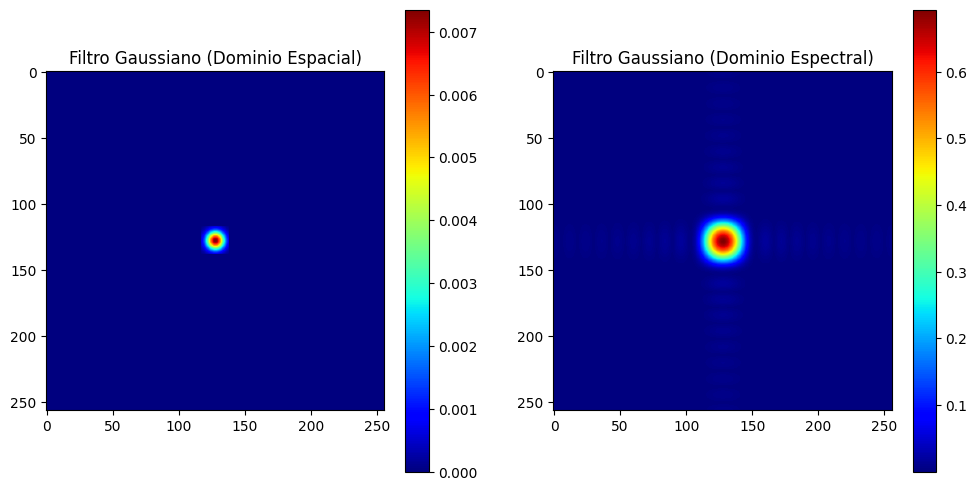

In [185]:
def plot_filters(gauss_kernel, gauss_kernel_fourier):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Filtro Gaussiano (Dominio Espacial)')
    plt.imshow(gauss_kernel, cmap='jet')
    plt.colorbar()

    plt.subplot(1, 2, 2)
    plt.title('Filtro Gaussiano (Dominio Espectral)')
    plt.imshow(np.log(np.abs(gauss_kernel_fourier) + 1), cmap='jet')
    plt.colorbar()

    plt.show()

h, w = 256, 256  # Tamaño de la imagen
k_size = 21      # Tamaño del kernel
sigma = 5        # Desviación estándar

gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)
plot_filters(gauss_kernel, gauss_kernel_fourier)


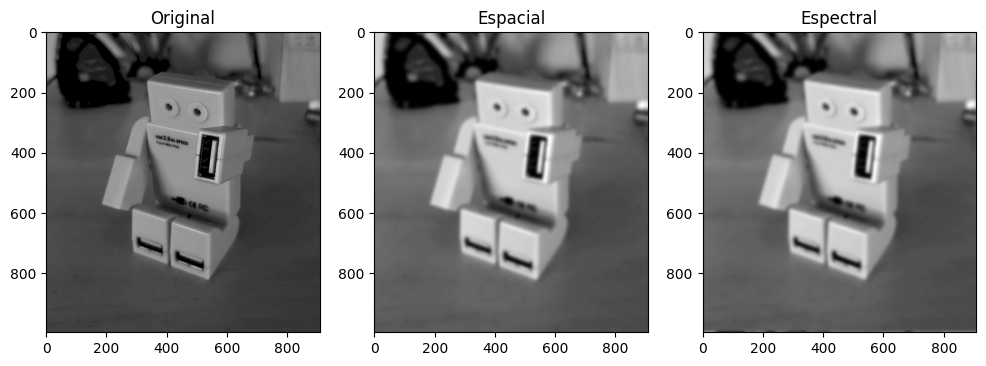

In [187]:
# Leer la imagen en escala de grises
image = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png', cv.IMREAD_GRAYSCALE)
h, w = image.shape[0], image.shape[1] 
k_size = 21      # Tamaño del kernel
sigma = 5        # Desviación estándar

# Crear el filtro gaussiano
gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Aplicar el filtro
filtered_image_spatial, filtered_image_spectral = apply_filter(image, gauss_kernel, gauss_kernel_fourier)

# Visualizar las imágenes resultantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Espacial')
plt.imshow(filtered_image_spatial, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Espectral')
plt.imshow(filtered_image_spectral, cmap='gray')

plt.show()


In [188]:
h, w = image.shape[0], image.shape[1]  # Tamaño de la imagen
k_size = 35      # Tamaño del kernel
sigma = 7        # Desviación estándar

gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Leer la imagen en escala de grises
image = cv2.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png', cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Crear el filtro gaussiano
gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Aplicar el filtro
filtered_image_spatial, filtered_image_spectral = apply_filter(image, gauss_kernel, gauss_kernel_fourier)

# Visualizar las imágenes resultantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Espacial')
plt.imshow(filtered_image_spatial, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Espectral')
plt.imshow(filtered_image_spectral, cmap='gray')

plt.show()


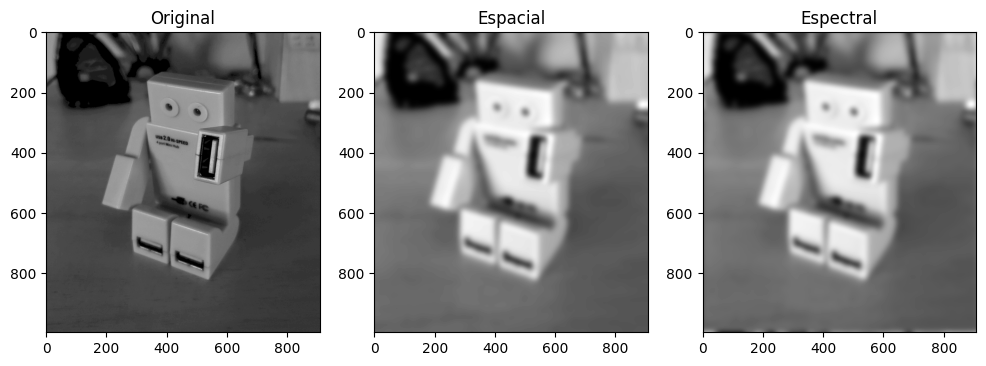

In [189]:
h, w = image.shape[0], image.shape[1]  # Tamaño de la imagen
k_size = 49      # Tamaño del kernel
sigma = 9        # Desviación estándar

gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Leer la imagen en escala de grises
image = cv2.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png', cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Crear el filtro gaussiano
gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Aplicar el filtro
filtered_image_spatial, filtered_image_spectral = apply_filter(image, gauss_kernel, gauss_kernel_fourier)

# Visualizar las imágenes resultantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Espacial')
plt.imshow(filtered_image_spatial, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Espectral')
plt.imshow(filtered_image_spectral, cmap='gray')

plt.show()


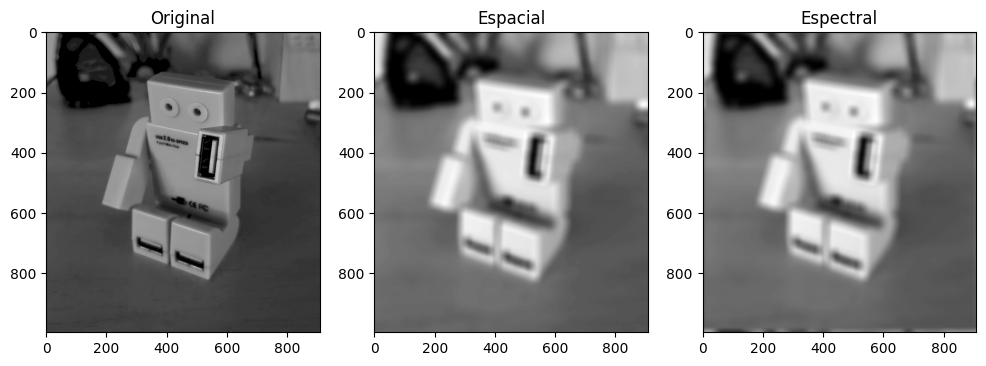

In [133]:

# Leer la imagen en escala de grises
image = cv2.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_2.png', cv2.IMREAD_GRAYSCALE)
h, w = image.shape

# Crear el filtro gaussiano
gauss_kernel, gauss_kernel_fourier = create_gauss_filter(h, w, k_size, sigma)

# Aplicar el filtro
filtered_image_spatial, filtered_image_spectral = apply_filter(image, gauss_kernel, gauss_kernel_fourier)

# Visualizar las imágenes resultantes
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Espacial')
plt.imshow(filtered_image_spatial, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Espectral')
plt.imshow(filtered_image_spectral, cmap='gray')

plt.show()


Métrica de nitidez del paper "Image Sharpness Measure for Blurred Images in Frequency Domain"

El paper propone una métrica basada en la energía de alta frecuencia en la imagen. Una manera común de hacerlo es utilizando la suma de los valores absolutos del espectro de Fourier.

In [190]:
# Input: Image I of size MxN
I = image.copy
# Output: Image Quality measure (FM) where FM stands for Frequency Domain Image Blur Measure
def image_quality_measure(image):
    # Step 1: Compute F which is the Fourier Transform representation of image I
    F = np.fft.fft2(image)
    # Step 2: Find Fc which is obtained by shifting the origin of F to the centre
    Fc = np.fft.fftshift(F)
    # Step 3: Calculate AF = abs (Fc) where AF is the absolute value of the centered Fourier transform of Image I
    AF = np.abs(Fc)
    # Step 4: Calculate M = max (AF) where M is the maximum value of the frequency component in F
    M = np.max(AF)
    # Step 5: Calculate TH = the total number of pixels in F whose pixel value > thres, where thres = M/1000
    thres = M/1000
    TH = np.sum(F>thres)
    # Step 6: Calculate Image Quality measure (FM) from equation (1)
    FM = TH / (image.shape[0] * image.shape[1])
    return FM

En el dominio espacial:

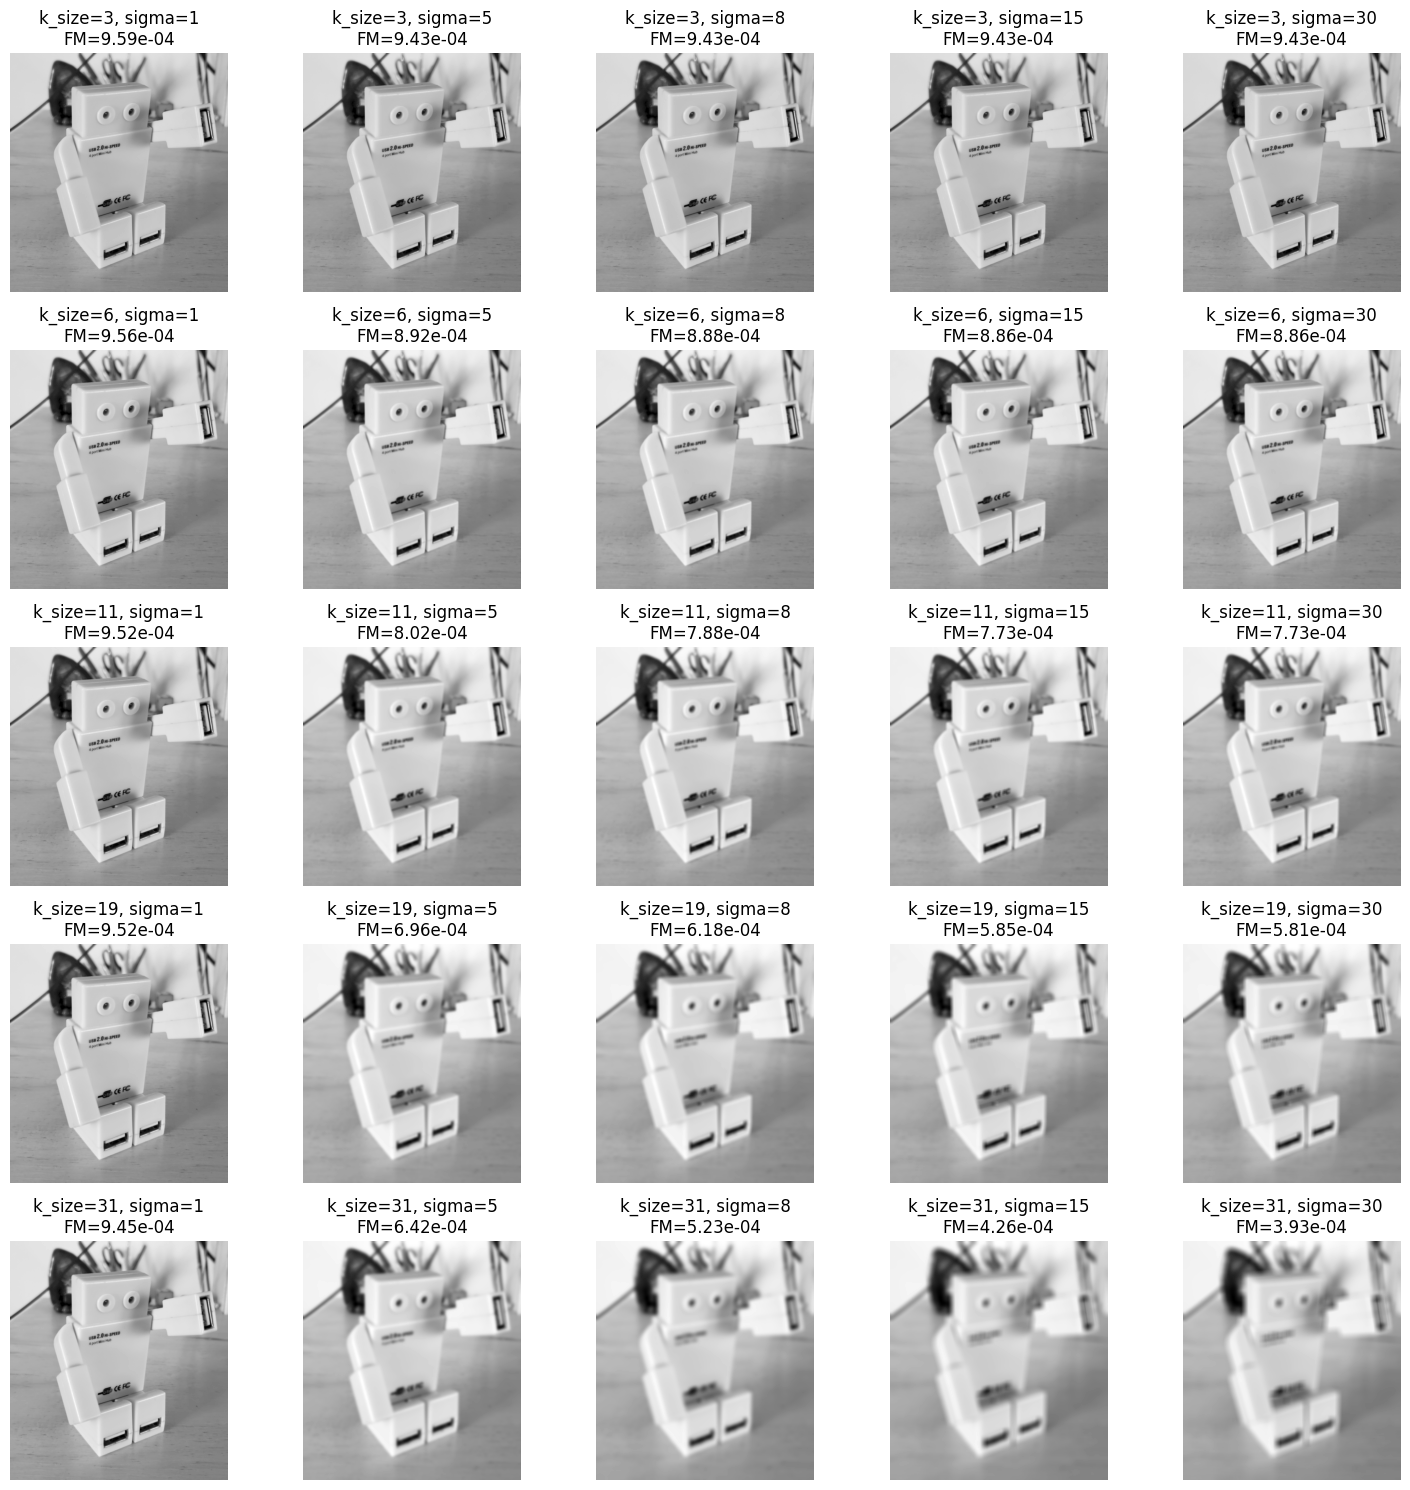

In [191]:
img = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png', cv.IMREAD_GRAYSCALE)

# Parámetros
h, w = img.shape[0], img.shape[1] 
k_sizes = [3, 6, 11, 19, 31] 
sigmas = [1, 5, 8, 15, 30]

fig1, axs1 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 15))

# Iterar sobre los valores de sigma y k_size
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image, _ = apply_filter(img, kernel, kernel_fft)

        FM = image_quality_measure(filtered_image)

        axs1[i, j].imshow(filtered_image, cmap='gray')
        axs1[i, j].set_title(f'k_size={k_size}, sigma={sigma}\nFM={FM:.2e}')
        axs1[i, j].axis('off')

plt.tight_layout()
plt.show()

En el dominio espectral:

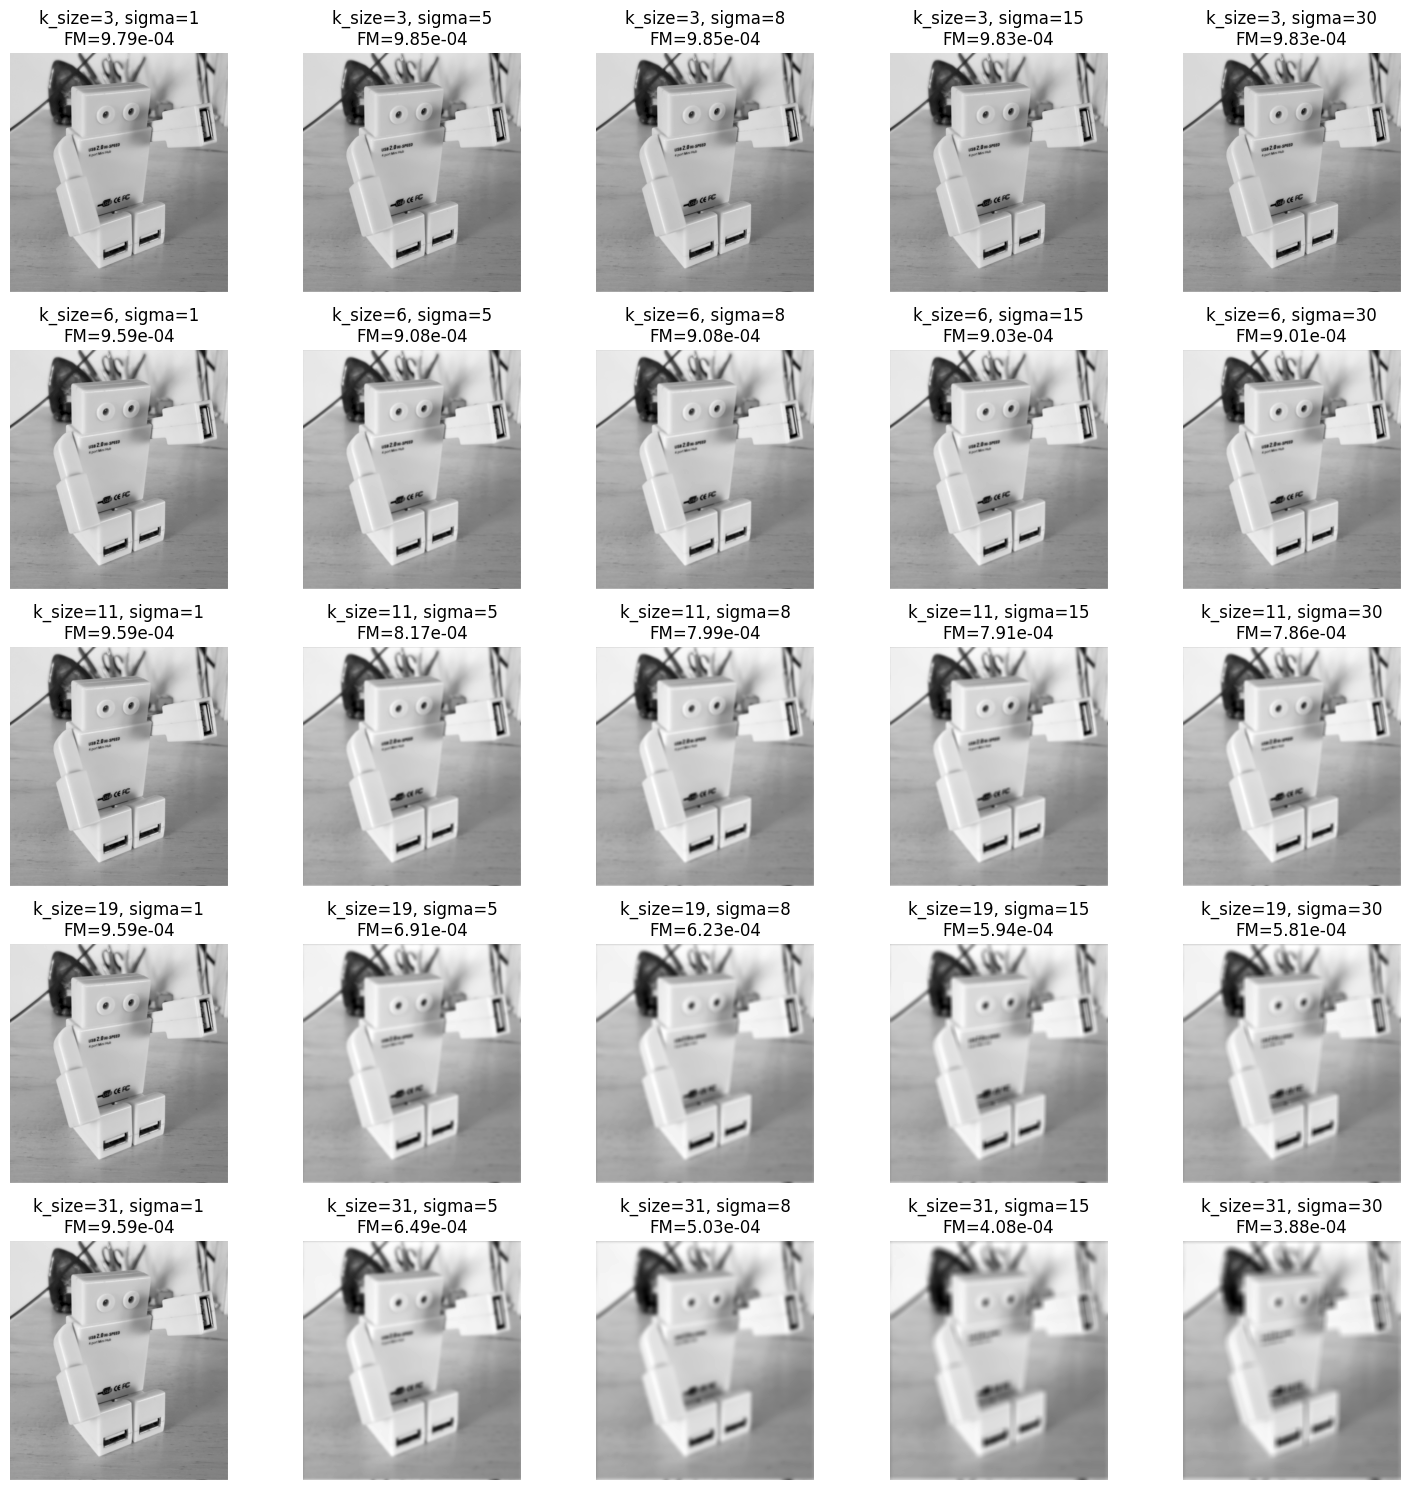

In [192]:

fig1, axs1 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 15))

# Iterar sobre los valores de sigma y k_size
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        _, filtered_image = apply_filter(img, kernel, kernel_fft)

        FM = image_quality_measure(filtered_image)

        axs1[i, j].imshow(filtered_image, cmap='gray')
        axs1[i, j].set_title(f'k_size={k_size}, sigma={sigma}\nFM={FM:.2e}')
        axs1[i, j].axis('off')

plt.tight_layout()
plt.show()

Podemos ver que en ambos casos las métricas son muy similares tanto para el dominio espacial como el dominio espectral por lo que podemos concluir que se podrían trabajar indistintamente en cualquiera de los dos dominios, teniendo como ventaja la optimización que brinda trabajar en el dominio espectral con las imagenes procesadas y las transformaciones de fourier ya realizadas.

Implementar una métrica de nitidez del paper "Analysis of focus measure operators in shape-from-focus"

Una métrica comúnmente utilizada en este contexto es la varianza del Laplaciano.

In [193]:
def variance_of_laplacian(image):

    # Calcular el Laplaciano de la imagen
    laplacian = cv.Laplacian(image, cv.CV_64F)
    
    # Calcular la media del Laplaciano
    mean_laplacian = np.mean(laplacian)

    # Calcular la varianza del Laplaciano utilizando la media calculada
    variance_laplacian = np.mean((laplacian - mean_laplacian) ** 2)

    return variance_laplacian


En el dominio espacial:

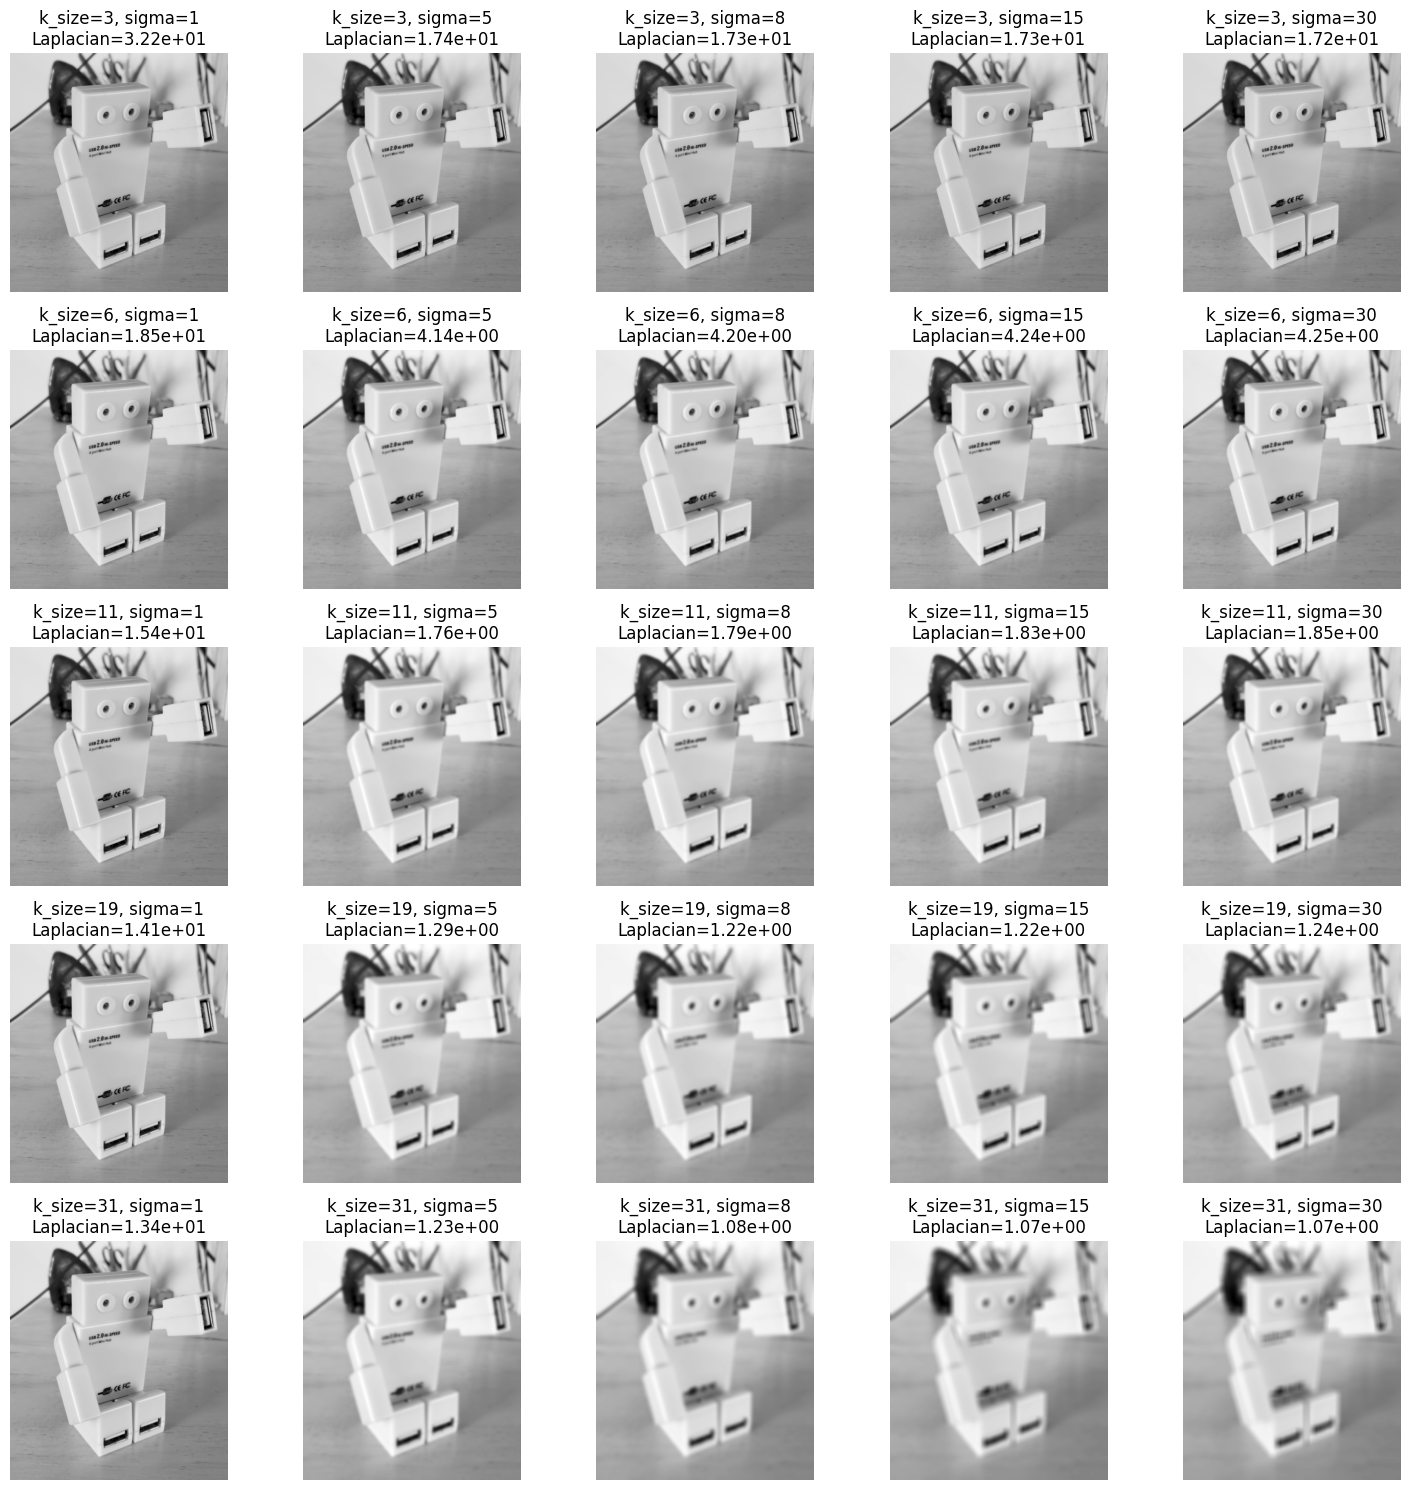

In [194]:
img = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png', cv.IMREAD_GRAYSCALE)

# Parámetros
h, w = img.shape[0], img.shape[1] 
k_sizes = [3, 6, 11, 19, 31] 
sigmas = [1, 5, 8, 15, 30]

fig1, axs1 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 15))

# Iterar sobre los valores de sigma y k_size
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        filtered_image, _ = apply_filter(img, kernel, kernel_fft)

        laplacian = variance_of_laplacian(filtered_image)

        axs1[i, j].imshow(filtered_image, cmap='gray')
        axs1[i, j].set_title(f'k_size={k_size}, sigma={sigma}\nLaplacian={laplacian:.2e}')
        axs1[i, j].axis('off')

plt.tight_layout()
plt.show()

En el dominio espectral:

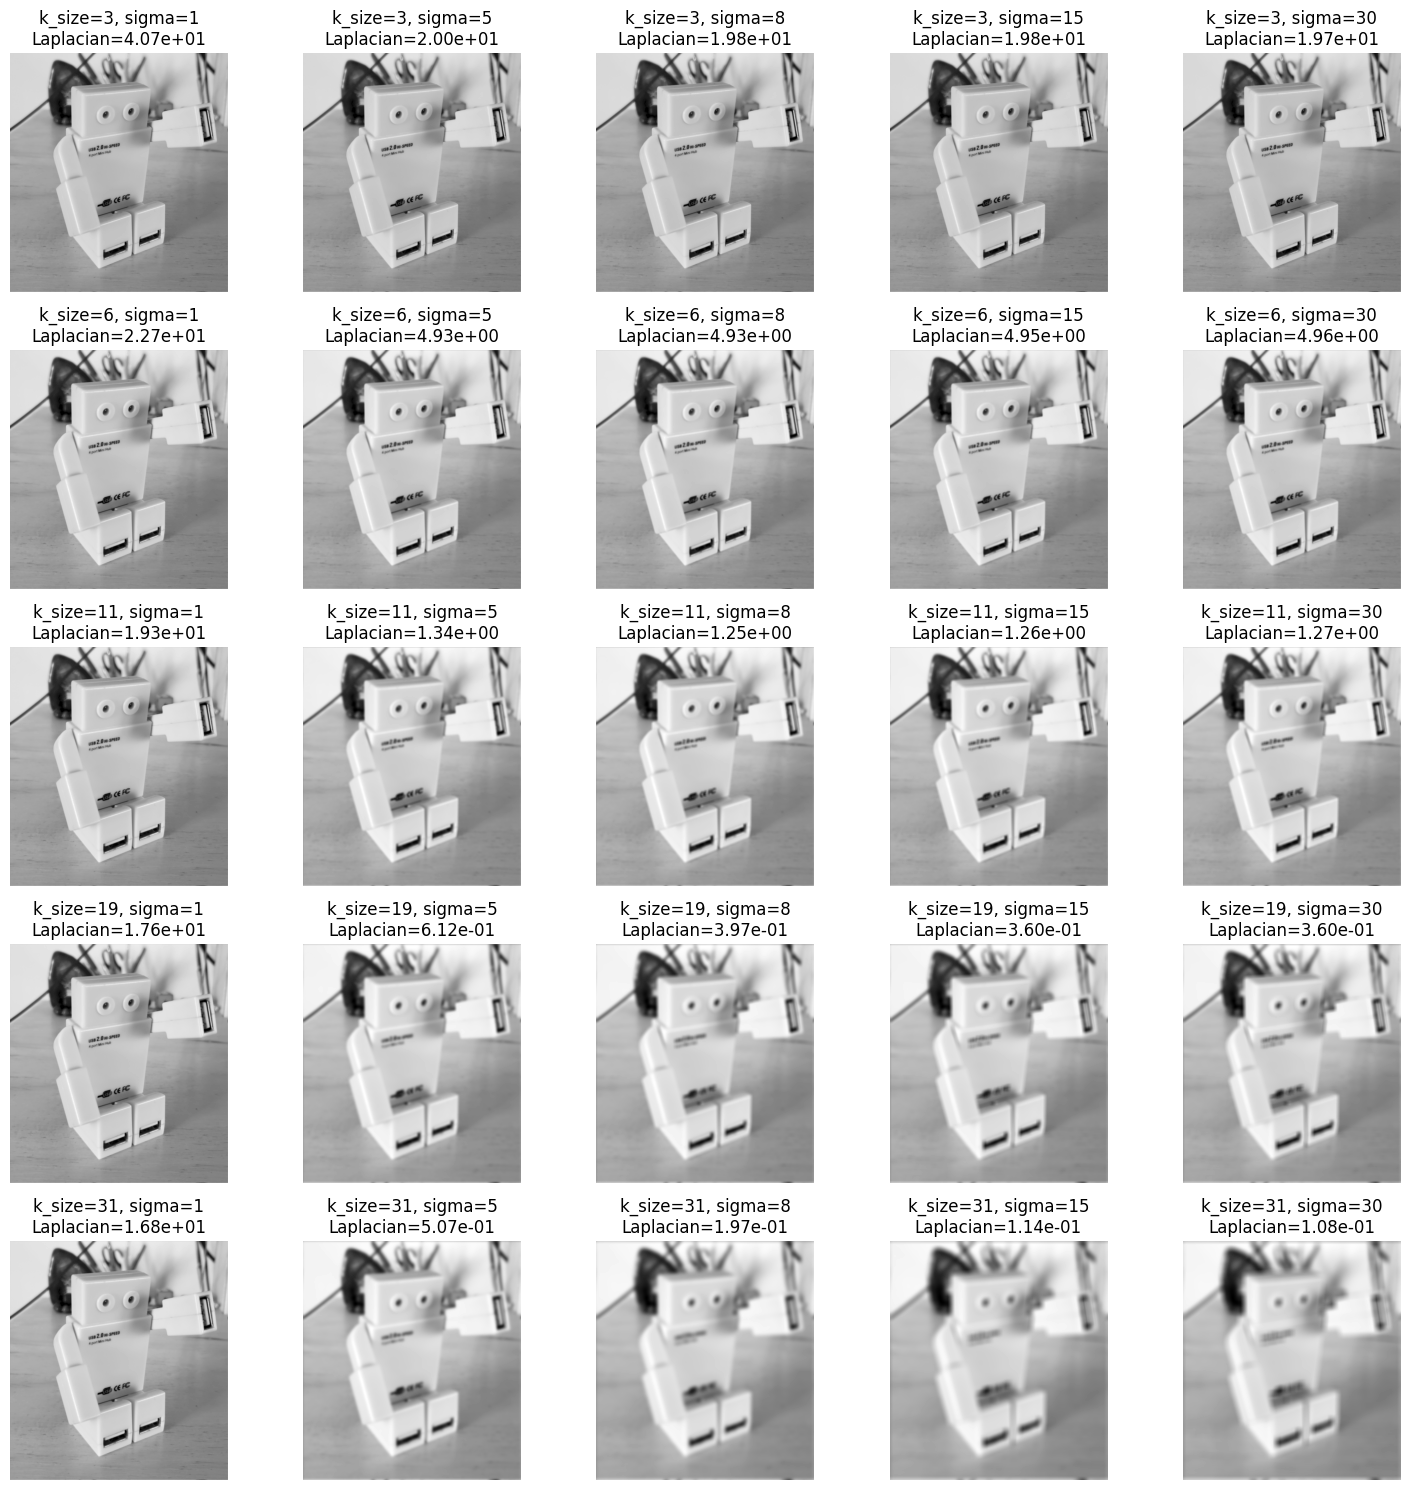

In [195]:
img = cv.imread('./Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png', cv.IMREAD_GRAYSCALE)

# Parámetros
h, w = img.shape[0], img.shape[1] 
k_sizes = [3, 6, 11, 19, 31] 
sigmas = [1, 5, 8, 15, 30]

fig1, axs1 = plt.subplots(len(k_sizes), len(sigmas), figsize=(15, 15))

# Iterar sobre los valores de sigma y k_size
for i, k_size in enumerate(k_sizes):
    for j, sigma in enumerate(sigmas):
        kernel, kernel_fft = create_gauss_filter(h, w, k_size, sigma)
        
        _ , filtered_image = apply_filter(img, kernel, kernel_fft)

        laplacian = variance_of_laplacian(filtered_image)

        axs1[i, j].imshow(filtered_image, cmap='gray')
        axs1[i, j].set_title(f'k_size={k_size}, sigma={sigma}\nLaplacian={laplacian:.2e}')
        axs1[i, j].axis('off')

plt.tight_layout()
plt.show()

Podemos ver que en ambos casos podemos ver la relación inversa entre la métrica y la calidad de la imagen, tanto para el dominio espacial como el dominio espectral.